In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix

In [2]:
iris_df = pd.read_csv("C:\data\iris.data.csv") #Load Data

In [3]:
iris_df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
X = iris_df.iloc[:,:-1].values

y = iris_df.iloc[:,-1].values

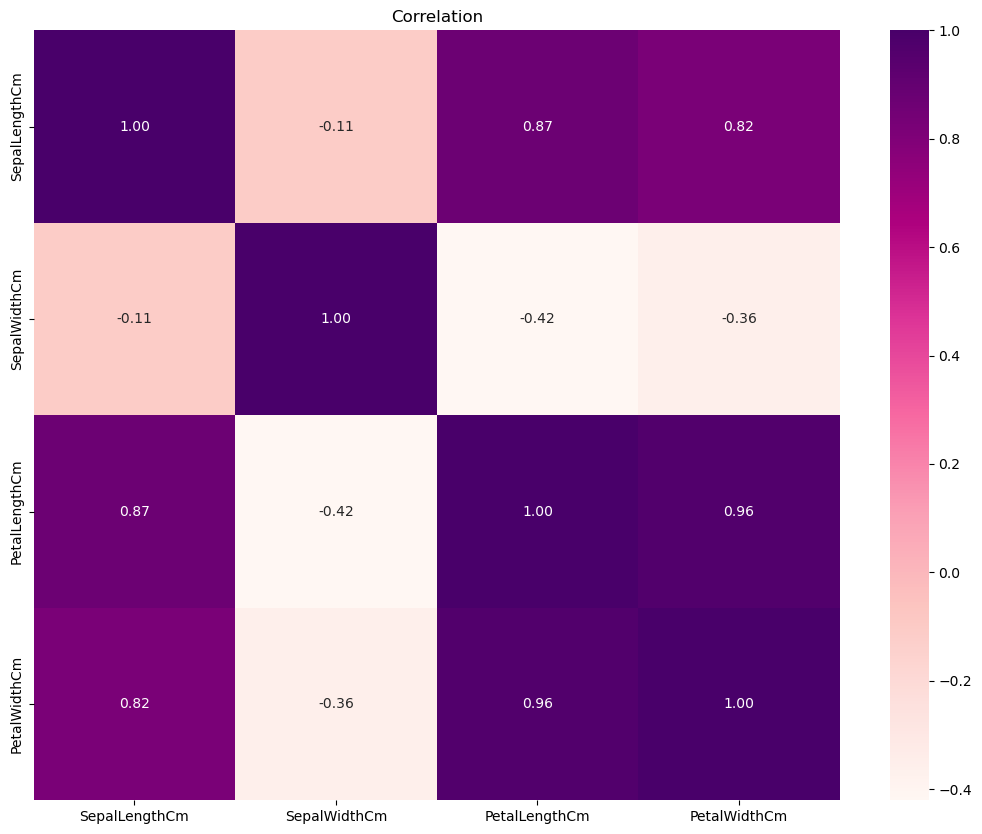

In [5]:
plt.figure(figsize=(13,10))
col=iris_df.corr()
sns.heatmap(col,annot=True,fmt='.2f',cmap="RdPu");
plt.title("Correlation")
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

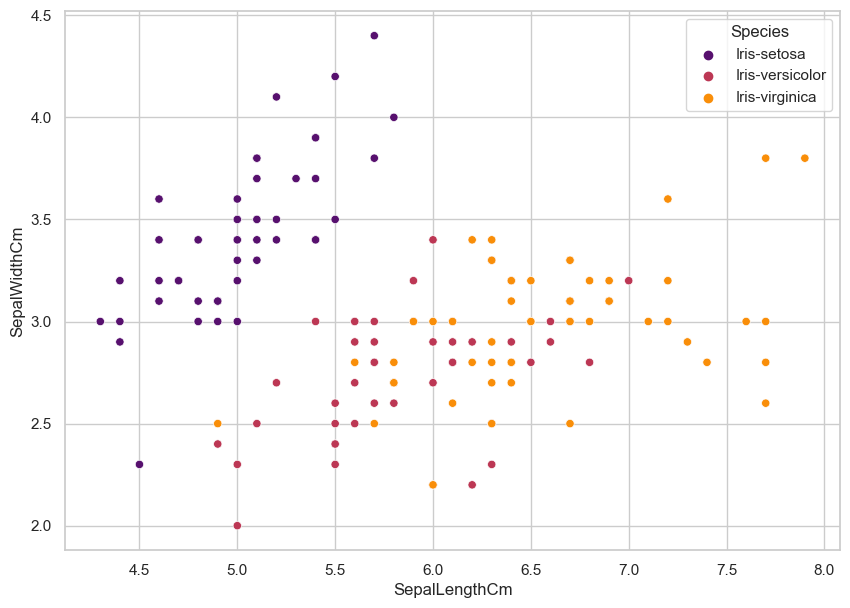

In [6]:
fig = plt.figure(figsize = (10, 7))
sns.set(style='whitegrid')
sns.scatterplot(x="SepalLengthCm",
                    y="SepalWidthCm",hue='Species',
                    data=iris_df, palette="inferno")

In [7]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
iris_df['Species']= label_encoder.fit_transform(iris_df['Species'])

In [8]:
X=iris_df[['SepalLengthCm', 'PetalWidthCm']]
y=iris_df['Species']
X.head()

,SepalLengthCm,PetalWidthCm
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


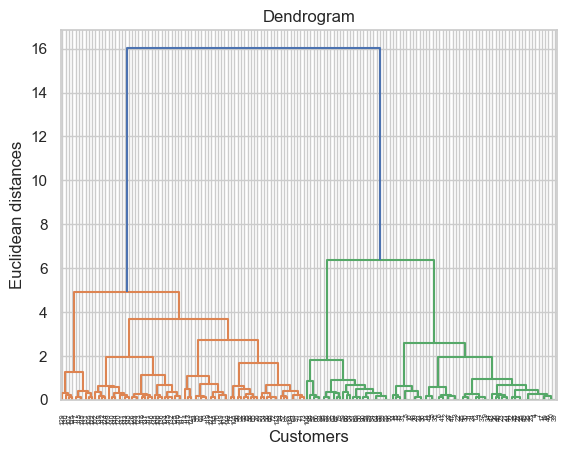

In [9]:
 # importing scipy.cluster.hierarchy for dendrogram
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') 
plt.xlabel('Customers')
plt.ylabel('Euclidean distances') 
plt.show() 

In [10]:
from sklearn.cluster import AgglomerativeClustering
opt_Agg_hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
opt_y_hc = opt_Agg_hc.fit_predict(X)

In [11]:
data_with_clusters1 = X.copy()
data_with_clusters1['Clusters'] = opt_y_hc 

In [12]:
def scatterplot(newdata):
    fig, (ax0,ax1)= plt.subplots(nrows=1, 
                                 ncols=2, 
                                 figsize=(20,8))

    scatter0=ax0.scatter(X['SepalLengthCm'],
                         X['PetalWidthCm'],
                         c=y, cmap='winter')

    ax0.set(title='Actual', 
           xlabel='SepalLengthCm', 
           ylabel='PetalWidthCm')

    ax0.legend(*scatter0.legend_elements(), title='Species');

    scatter1=ax1.scatter(newdata['SepalLengthCm'],
                         newdata['PetalWidthCm'],
                         c=newdata['Clusters'],
                         cmap='rainbow')

    ax1.set(title='Predicted', 
            xlabel='SepalLengthCm', 
            ylabel='PetalWidthCm')

    ax1.legend(*scatter1.legend_elements(), title='new_labels');


    fig.suptitle("Actual vs Predicted Scatter plot for Sepal Length and Petal Width", 
                 fontsize=16, 
                 fontweight='bold');

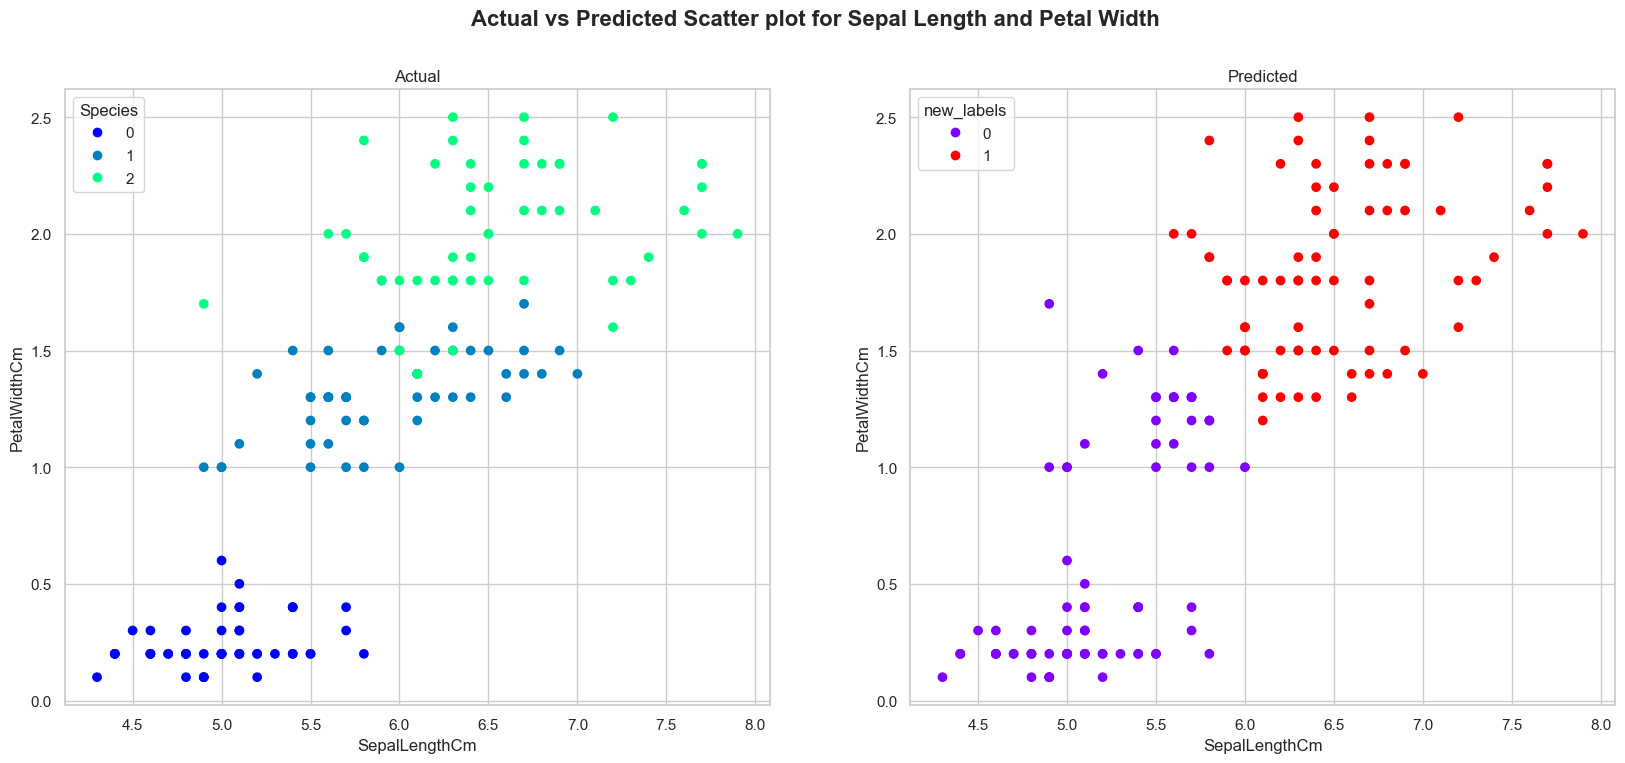

In [13]:
scatterplot(data_with_clusters1)

In [14]:
#For n_clusters=3
Agg_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(X) 

In [15]:
data_with_clusters2 = X.copy()
data_with_clusters2['Clusters'] = y_hc 

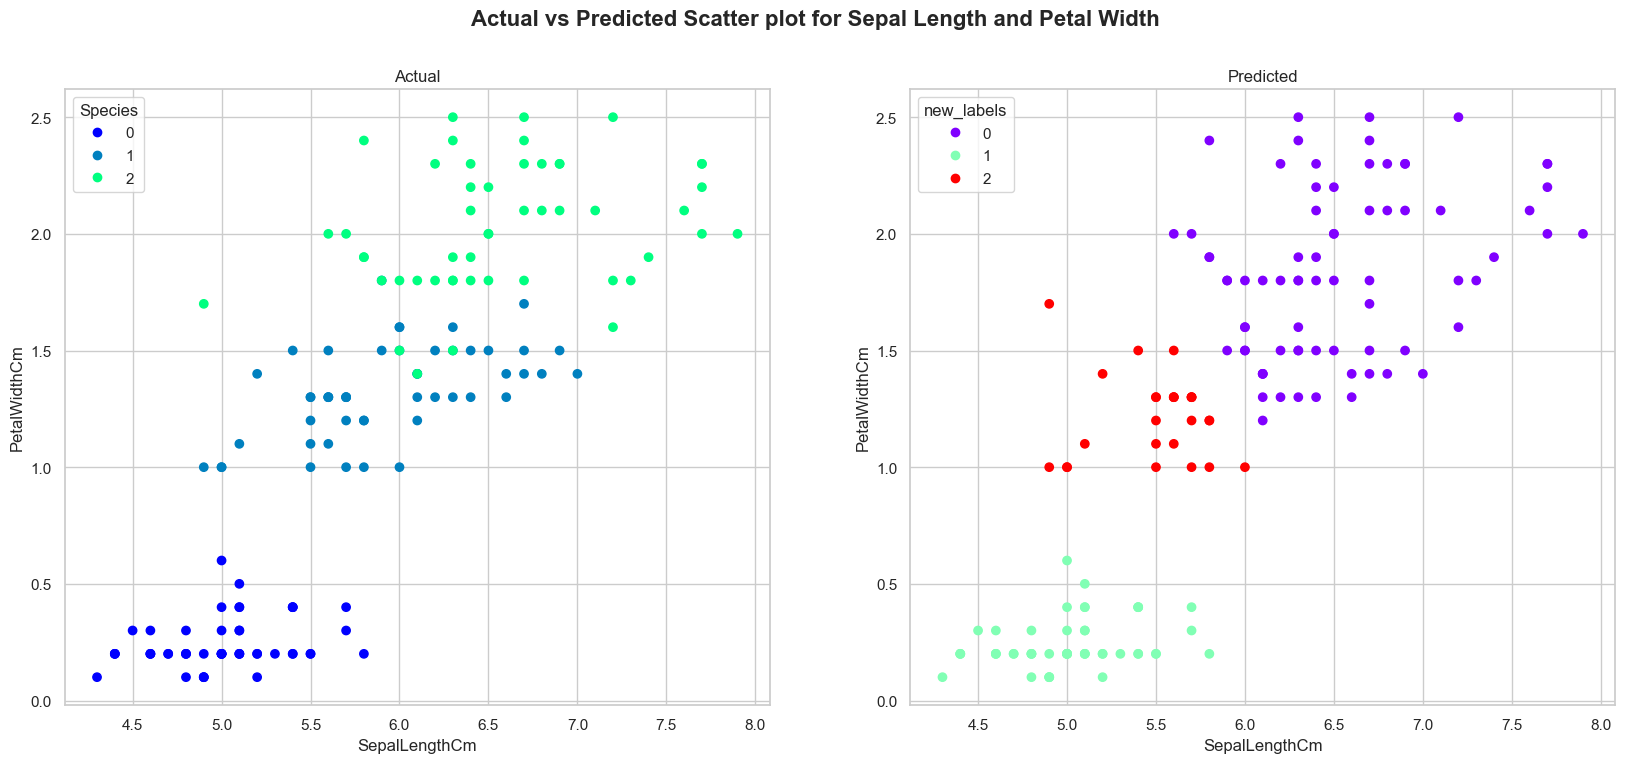

In [16]:
scatterplot(data_with_clusters2)

In [20]:
labels = Agg_hc.labels_
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 82.67%
